In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib


from astropy.io import fits


from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
file = 'III_159A_catalog.dat'
names = ('Star', 'Nobs', 'Smin', 'Smax', 'Smean', 'e_Smean', 'sdS', 'Wmin', 'Wmean', 
         'Date1', 'Date2', 'SName', 'RAdeg DEdeg', 's', 'Bmag', 'Vmag', 'ASCC', 'HIP')
hk = pd.read_table(file, delimiter='|', comment='#', names=names)

radec = hk['RAdeg DEdeg'].str.split(' ', expand=True).loc[:,0:1]
radec.columns = ['RA', 'Dec']

In [3]:
# i = 281 # the star w/ 77 visits in GALEX (HD 4174, symbiotic M giant)

i = 261 # 74 visits (HD 3765)

In [4]:
target = hk['Star'][i]
# ra = float(radec['RA'][i][1:])
# dec = float(radec['Dec'][i][1:])
ra = 10.2920
dec = 40.2025

step_size = 10. # the time resolution
img_step_size = 30.
img_size = [0.1, 0.1]
phot_rad = 0.0045
ap_in = 0.0050
ap_out = 0.0060



# img_step_size = 30.
#screen saver

print(target)

HD   3765 


In [5]:
exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)
k = 0;
timeArray = []
for tstart, tstop in zip(exp_data['NUV']['t0'], exp_data['NUV']['t1']):
        
        timeArray.append((tstart, tstop))
#         print(tstart, tstop, tstop-tstart)
        print(timeArray[k][0],timeArray[k][1],timeArray[k][1]-timeArray[k][0])
        k = k + 1
#         print(len(timeArray))
#         if k == 5:
#             break
        
            

NUV: 114113.0s (raw) in 74 exposures.
749646829.995 749647397.995 568.0
749651677.995 749653315.995 1638.0
750580904.995 750582295.995 1391.0
873882164.995 873883767.995 1603.0
874213366.995 874214202.995 836.0
874231111.995 874232816.995 1705.0
874728017.995 874728517.995 500.0
903965462.995 903966910.995 1448.0
903971379.995 903972827.995 1448.0
905592230.995 905593787.995 1557.0
905609883.995 905611532.995 1649.0
908934612.995 908936285.995 1673.0
908993735.995 908995437.995 1702.0
934810539.995 934811921.995 1382.0
934899261.995 934900698.995 1437.0
934988026.995 934989471.995 1445.0
935071049.995 935072321.995 1272.0
935165455.995 935167000.995 1545.0
935248261.995 935249836.995 1575.0
935337002.995 935338583.995 1581.0
935413860.995 935415492.995 1632.0
935508511.995 935510141.995 1630.0
935591282.995 935592956.995 1674.0
935680017.995 935681679.995 1662.0
935762789.995 935764486.995 1697.0
935863355.995 935865033.995 1678.0
935934301.995 935936007.995 1706.0
936028962.995 936030

In [37]:
(exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.)

array([  0.00000000e+00,   1.53729072e-04,   2.96193239e-02,
         3.93947663e+00,   3.94997898e+00,   3.95054167e+00,
         3.96629845e+00,   4.89341175e+00,   4.89359938e+00,
         4.94499623e+00,   4.94555600e+00,   5.05098246e+00,
         5.05285724e+00,   5.87150273e+00,   5.87431608e+00,
         5.87713080e+00,   5.87976344e+00,   5.88275704e+00,
         5.88538280e+00,   5.88819676e+00,   5.89063391e+00,
         5.89363527e+00,   5.89625993e+00,   5.89907369e+00,
         5.90169838e+00,   5.90488730e+00,   5.90713699e+00,
         5.91013867e+00,   5.91276351e+00,   5.98892095e+00,
         5.99173557e+00,   5.99436111e+00,   5.99698751e+00,
         5.99961396e+00,   6.00242881e+00,   6.00599248e+00,
         6.00880720e+00,   6.01143274e+00,   6.01405971e+00,
         6.01668582e+00,   6.01949937e+00,   6.02212443e+00,
         6.02737595e+00,   6.03018921e+00,   6.03281485e+00,
         6.03544127e+00,   6.03919140e+00,   6.04181710e+00,
         6.10954338e+00,

In [38]:
step_size = 100 # seconds

flux = np.zeros(len(exp_data['NUV']['t0']))

print(datetime.datetime.now())
for k in range(len(exp_data['NUV']['t0'])):
    photon_events = gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius= phot_rad,
                              annulus=[ap_in, ap_out], verbose=3, csvfile=target+ '_' +str(k)+"_lc.csv",
                              trange=[int(exp_data['NUV']['t0'][k]), int(exp_data['NUV']['t1'][k])+1], 
                              overwrite=True)
    data = read_lc(target+ '_' +str(k)+"_lc.csv")
    flux[k] = np.median(data['flux_bgsub'])
    


    
    print(datetime.datetime.now(), k)


2017-04-27 17:09:39.697064
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.292, 40.2025]
 tranges: [749646829, 749647398]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvfile: HD   3765 _0_lc.csv
 verbose: 3
2017-04-27 17:10:45.101928 0                                                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.292, 40.2025]
 tranges: [749651677, 749653316]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvfile: HD   3765 _1_lc.csv
 verbose: 3
2017-04-27 17:13:22.290815 1                                                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.292, 40.2025]
 tranges: [750580904, 750582296]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvf

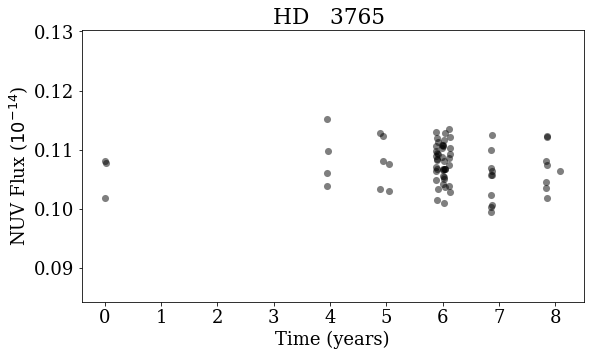

In [39]:
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (years)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.title(target + " newCoordinates")

plt.savefig(target+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

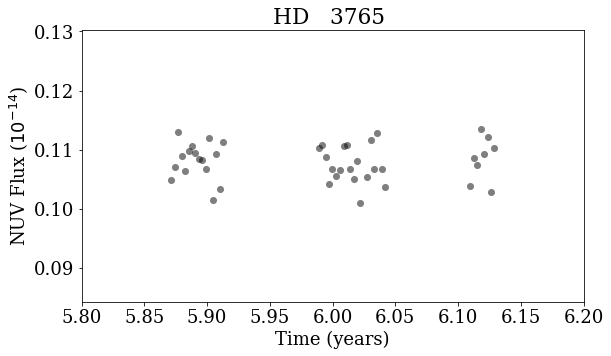

In [40]:
#let's explore just around year 6, big scatter
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (years)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.xlim(5.8,6.2)
plt.title(target)

# plt.savefig(target+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [10]:
exp_data['NUV']['t0'][0]

749646829.995

In [11]:
# lets see if the mean flux for each visit is available? (doubt it...)
# would eliminate need for gAperature step for quick-look evolution!
# exp_data2 = gFind(band="both", skypos=[ra, dec])

In [12]:
# exp_data2
# NOPE....

In [11]:

for k in range(0,len(timeArray)):
    
    w = str(k + 6)
    
    gMap(band= "NUV", skypos=[10.2920, 40.2025], stepsz=100 , skyrange=[0.020, 0.020],
             cntfile= "test/gj_3765_visitNumber_" + w + "_Apr28__movie.fits",
             trange=[timeArray[k][0], timeArray[k][1]])
    if k == 5:
        break
#   old skypos=[10.3042, 40.1888]


        


In [ ]:
gMap(band='NUV', skypos=[10.3042, 40.1888], skyrange=[0.033, 0.033], cntfile="helix_fuv.fits" )


In [ ]:
exp_data['NUV']

In [8]:

gMap(band= "NUV", skypos=[10.3042, 40.1888], stepsz=100 , skyrange=[0.05, 0.05],
             cntfile= "gj_3765test93_count_movie.fits", trange=[749646829, 749647398])